            seq_num             x             y             z         label
count  1.926896e+06  1.926896e+06  1.926896e+06  1.926896e+06  1.926896e+06
mean   6.711283e+04  1.987652e+03  2.382523e+03  1.970596e+03  3.882898e+00
std    4.146191e+04  1.113578e+02  1.003151e+02  9.445893e+01  2.443402e+00
min    0.000000e+00  2.820000e+02  2.000000e+00  1.000000e+00  0.000000e+00
25%    3.211400e+04  1.904000e+03  2.337000e+03  1.918000e+03  1.000000e+00
50%    6.422900e+04  1.992000e+03  2.367000e+03  1.988000e+03  4.000000e+00
75%    9.839400e+04  2.076000e+03  2.413000e+03  2.032000e+03  7.000000e+00
max    1.667400e+05  3.828000e+03  4.095000e+03  4.095000e+03  7.000000e+00
seq_num    0
x          0
y          0
z          0
label      0
dtype: int64


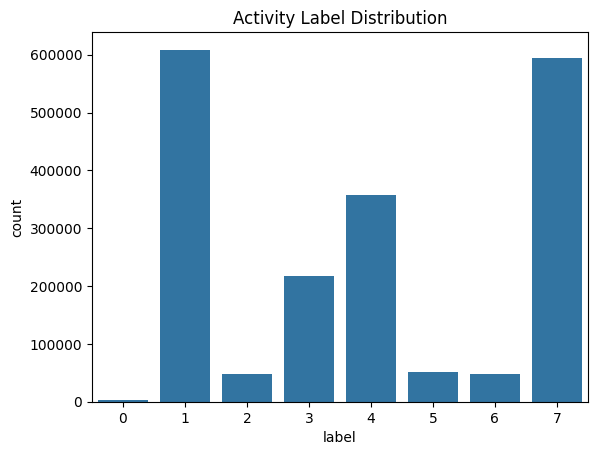

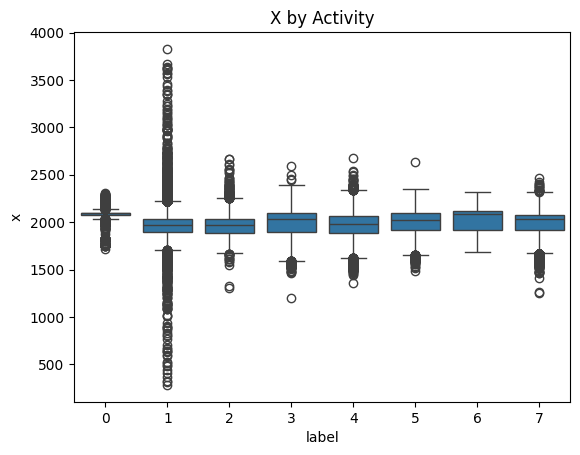

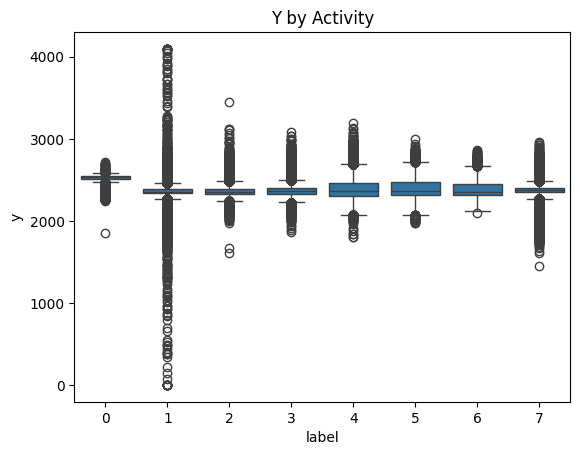

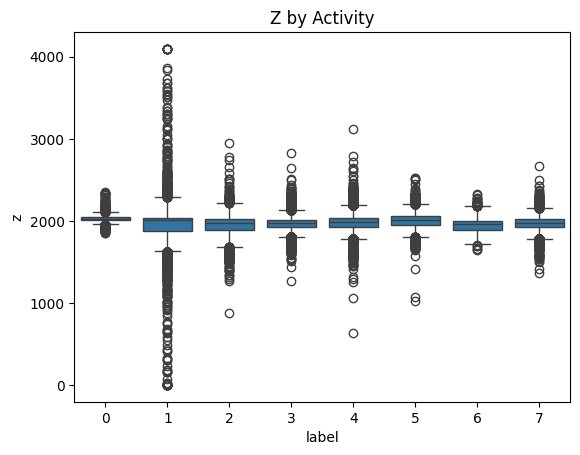

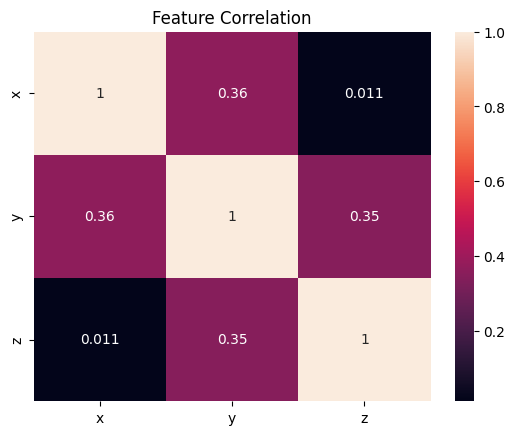

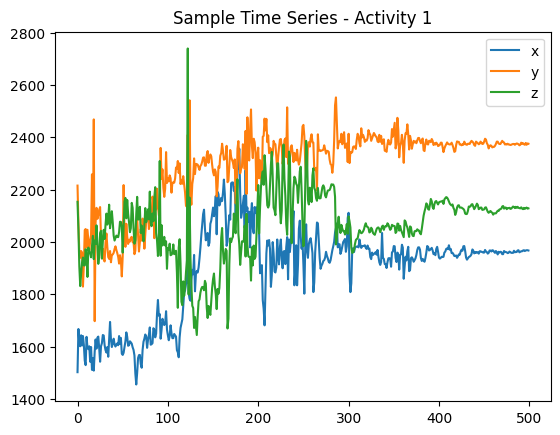

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

# Read all CSV files
data_path = r'C:\Users\USER\Downloads\action_classification_repo\action-classification\data'
all_files = glob.glob(os.path.join(data_path, "*.csv"))
df_list = [pd.read_csv(f, names=['seq_num', 'x', 'y', 'z', 'label']) for f in all_files]
df = pd.concat(df_list, ignore_index=True)

# Summary statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

# Class distribution
sns.countplot(x='label', data=df)
plt.title('Activity Label Distribution')
plt.show()

# Boxplots per activity
for feature in ['x', 'y', 'z']:
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature.upper()} by Activity')
    plt.show()

# Correlation matrix
sns.heatmap(df[['x', 'y', 'z']].corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

# Sample time series plot for activity (e.g., label=1)
sample = df[df['label'] == 1][:500]
plt.plot(sample['seq_num'], sample['x'], label='x')
plt.plot(sample['seq_num'], sample['y'], label='y')
plt.plot(sample['seq_num'], sample['z'], label='z')
plt.legend()
plt.title('Sample Time Series - Activity 1')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['x', 'y', 'z']] = scaler.fit_transform(df[['x', 'y', 'z']])


In [5]:
from sklearn.model_selection import train_test_split

X = df[['x', 'y', 'z']]
y = df['label'] # Convert labels to 0–6 for scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.19      0.08      0.11       744
           1       0.86      0.89      0.87    121734
           2       0.40      0.20      0.27      9575
           3       0.54      0.43      0.48     43347
           4       0.62      0.72      0.66     71413
           5       0.29      0.13      0.18     10300
           6       0.38      0.21      0.27      9554
           7       0.75      0.80      0.77    118713

    accuracy                           0.72    385380
   macro avg       0.50      0.43      0.45    385380
weighted avg       0.71      0.72      0.71    385380



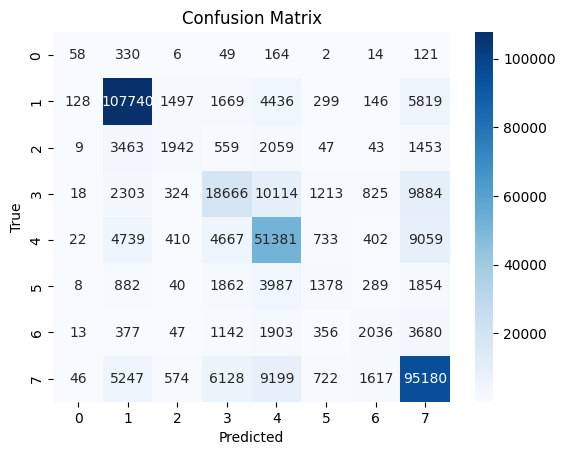

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
